In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)

# NumPy (tiếp)

In [5]:
a = np.arange(12).reshape(3,4)

## take và put (giống fancy indexing)

In [97]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [98]:
a[[1,2]]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [99]:
a[:,[1,2]]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [100]:
a[[1,2]] = 1

In [101]:
a

array([[0, 1, 2, 3],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [102]:
a.take([0,2],axis=0)

array([[0, 1, 2, 3],
       [1, 1, 1, 1]])

In [103]:
a = np.array(list(reversed(range(9))))
a

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [104]:
a[[2,5,3]]
a.take([[2,5,3]])

array([6, 3, 5])

array([[6, 3, 5]])

In [105]:
a.put([2,5,3],[10,20,30])

In [106]:
a

array([ 8,  7, 10, 30,  4, 20,  2,  1,  0])

## Broadcasting

In [107]:
arr = np.arange(5)

In [108]:
arr       
arr*3     # 3 được broadcast tới tất cả các phần tử của arr trong phép nhân

array([0, 1, 2, 3, 4])

array([ 0,  3,  6,  9, 12])

In [109]:
arr = np.random.randn(3, 4)
arr
arr.shape

array([[ 0.8953, -1.0213,  0.0257, -1.0787],
       [ 0.7903, -0.1313,  1.8351, -2.9061],
       [ 0.0469, -1.2264, -2.3196,  0.2596]])

(3, 4)

In [110]:
b = arr.mean(0)
b.shape

(4,)

In [111]:
tru_mean = arr - arr.mean(0)
tru_mean

array([[ 0.3178, -0.2283,  0.1786,  0.163 ],
       [ 0.2128,  0.6617,  1.988 , -1.6644],
       [-0.5306, -0.4334, -2.1667,  1.5013]])

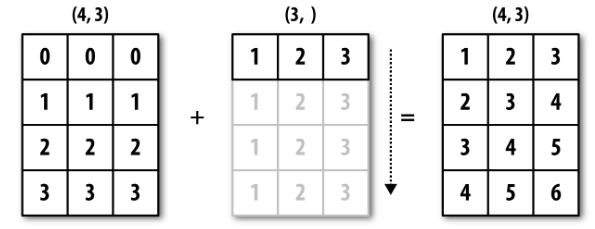

In [112]:
from IPython.display import Image
Image("broadcasting1.png")

In [113]:
tru_mean.mean(0)

array([ 0., -0.,  0.,  0.])

In [114]:
arr.mean(1)

array([-0.2947, -0.103 , -0.8099])

In [115]:
c = arr.mean(1)
c.shape

(3,)

In [116]:
arr.shape
c.reshape((3,1))

(3, 4)

array([[-0.2947],
       [-0.103 ],
       [-0.8099]])

In [117]:
tru_mean2 = arr - c.reshape((3,1))
tru_mean2

array([[ 1.19  , -0.7265,  0.3205, -0.7839],
       [ 0.8933, -0.0283,  1.9381, -2.8031],
       [ 0.8568, -0.4166, -1.5097,  1.0695]])

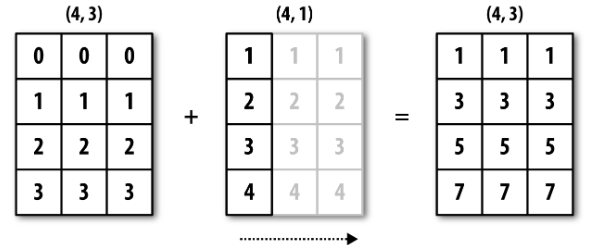

In [118]:
Image("broadcasting2.png")

In [119]:
tru_mean2.mean(1)

array([ 0.,  0., -0.])

In [120]:
a = np.arange(24).reshape(3,4,2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [121]:
b = np.arange(8).reshape(4,2)
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [122]:
a + b

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]],

       [[ 8, 10],
        [12, 14],
        [16, 18],
        [20, 22]],

       [[16, 18],
        [20, 22],
        [24, 26],
        [28, 30]]])

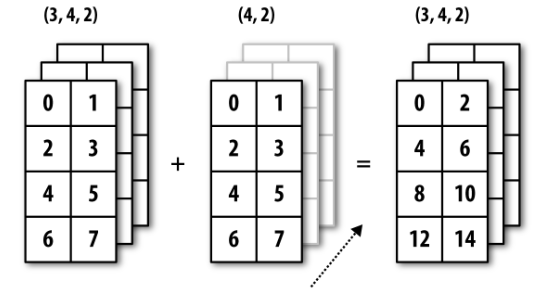

In [123]:
Image("broadcasting3.png")

In [124]:
# Quy tắc broadcasting : Hai mảng là thích hợp cho broadcasting nếu với mồi chiều tính từ cuối , 
# độ dài của các trục giống nhau hoặc có ít nhất 1 trong 2 có độ dài là 1.
# Broadcasting được biểu diễn dọc theo các chiều độ dài 1 hoặc còn thiếu.

In [125]:
arr = np.zeros((4, 4))

In [126]:
arr_3d = arr[:, np.newaxis, :]

In [127]:
arr_3d.shape

(4, 1, 4)

In [128]:
arr_1d = np.random.normal(size=3)

In [138]:
arr_1d[:, np.newaxis]
arr_1d[:, np.newaxis].shape

array([[ 0.5221],
       [ 0.5467],
       [-1.1813]])

(3, 1)

In [137]:
arr_1d[np.newaxis,:]
arr_1d[np.newaxis,:].shape

array([[ 0.5221,  0.5467, -1.1813]])

(1, 3)

In [145]:
arr = np.random.randn(3, 4, 5)

In [152]:
axis2_means = arr.mean(2)

In [153]:
axis2_means

array([[-0.2084, -0.4133, -0.813 ,  0.3224],
       [ 0.1858,  0.7075, -0.2085, -0.123 ],
       [-0.696 , -0.0112, -0.207 ,  0.1025]])

In [158]:
axis2_means.shape

(3, 4)

In [160]:
axis2_means[:, :, np.newaxis].shape
tru_mean = arr - axis2_means[:, :, np.newaxis]
tru_mean.mean(2)

(3, 4, 1)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.],
       [ 0.,  0.,  0., -0.]])

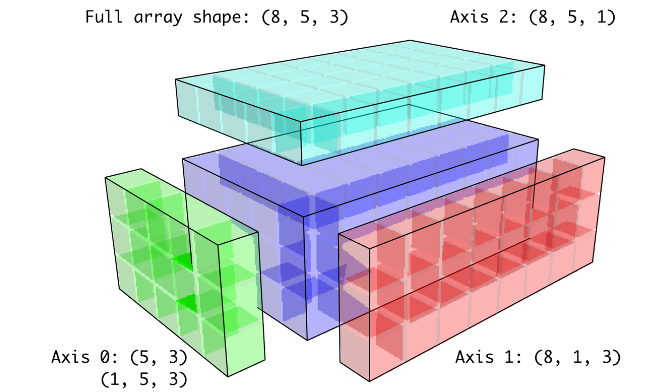

In [161]:
Image("broadcasting4.png")

## Set giá trị mảng bằng broadcasting

In [6]:
arr = np.zeros((4,3))

In [9]:
arr[:] = 3  # simple cases

In [12]:
arr

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [13]:
col = np.arange(4)

In [15]:
arr[:] = col[: , np.newaxis]

In [16]:
arr

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [17]:
arr[:2] = [[10],[20]]

In [18]:
arr

array([[10., 10., 10.],
       [20., 20., 20.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.]])

## Advanced use of ufunc

In [40]:
## ufunc methods, một số ví dụ


In [20]:
arr = np.arange(10)

In [21]:
np.add.reduce(arr)

45

In [22]:
arr.sum()

45

In [23]:
np.random.seed(1234)

In [24]:
arr = np.random.randn(4,4)

In [25]:
arr[::2].sort(1)

In [26]:
arr

array([[-1.191 , -0.3127,  0.4714,  1.4327],
       [-0.7206,  0.8872,  0.8596, -0.6365],
       [-2.2427,  0.0157,  0.9919,  1.15  ],
       [ 0.9533, -2.0213, -0.3341,  0.0021]])

In [28]:
arr[: , :-1] < arr[:,1:]

array([[ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [False,  True,  True]])

In [29]:
np.logical_and.reduce(arr[: , :-1] < arr[: , 1:] , axis = 1)

array([ True, False,  True, False])

In [30]:
np.logical_and.accumulate(arr[: , :-1] < arr[: , 1:],axis = 1)

array([[ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [False, False, False]])

In [32]:
## tạo new ufunc (pure Python ufuncs) 
## Chậm vì đòi hỏi a Python function call để tính mỗi phần tử

In [33]:
def add(x,y):
    return x+y

add2 = np.frompyfunc(add,2,1)

In [34]:
add2(np.arange(5),np.arange(5))

array([0, 2, 4, 6, 8], dtype=object)

In [35]:
add2_ = np.vectorize(add,otypes=[np.float64])

In [36]:
add2_(np.arange(5),np.arange(5))

array([0., 2., 4., 6., 8.])

In [37]:
arr = np.random.randn(1000)

In [38]:
%timeit add2_(arr,arr)

173 µs ± 870 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
%timeit np.add(arr,arr)

718 ns ± 3.68 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Structured Arrays

In [ ]:
# mỗi phần tử được biểu hiện trong bộ nhớ như là a fixed number of bytes
# fixed length --> nhanh và hiệu quả 

In [41]:
newdtype =[('x',np.float64), ('y',np.int32)]

In [42]:
arr = np.array([(1.2,5),(np.e,1)],dtype=newdtype)

In [43]:
arr

array([(1.2   , 5), (2.7183, 1)], dtype=[('x', '<f8'), ('y', '<i4')])

In [44]:
arr[0]

(1.2, 5)

In [45]:
arr[0]['x']

1.2

In [46]:
arr['x']

array([1.2   , 2.7183])

In [47]:
newdtype2 = [('x', np.int64, 2), ('y', np.int32)]

In [49]:
arr2 = np.ones(3,dtype=newdtype2)

In [50]:
arr2

array([([1, 1], 1), ([1, 1], 1), ([1, 1], 1)],
      dtype=[('x', '<i8', (2,)), ('y', '<i4')])

In [51]:
arr2[0]['x']

array([1, 1])

In [52]:
arr2['x']

array([[1, 1],
       [1, 1],
       [1, 1]])

In [53]:
newdtype3 = [('x', [('a','f8'),('b','i4')], 2), ('y', np.int32)]

In [55]:
arr2 = np.array([((1,2),3),((4,5),6)],dtype=newdtype3)

In [56]:
arr2

array([([(1., 2), (1., 2)], 3), ([(4., 5), (4., 5)], 6)],
      dtype=[('x', [('a', '<f8'), ('b', '<i4')], (2,)), ('y', '<i4')])

In [57]:
arr2['x']

array([[(1., 2), (1., 2)],
       [(4., 5), (4., 5)]], dtype=[('a', '<f8'), ('b', '<i4')])

In [58]:
arr2['y']

array([3, 6], dtype=int32)

In [61]:
arr2['x']['a']

array([[1., 1.],
       [4., 4.]])

## Sorting (thêm)

In [62]:
arr = np.random.randn(5)

In [63]:
arr.sort() # ndarray sort

In [64]:
arr

array([-1.3783, -1.0775, -0.2951,  1.6289,  1.72  ])

In [65]:
arr = np.random.randn(3,4)

In [66]:
arr

array([[-0.3774,  0.0268, -0.9222, -1.4168],
       [ 0.8635, -0.2044, -2.1098, -0.5261],
       [ 0.0524, -1.7442,  0.0552,  0.4335]])

In [67]:
arr[:,0].sort()  

In [68]:
arr

array([[-0.3774,  0.0268, -0.9222, -1.4168],
       [ 0.0524, -0.2044, -2.1098, -0.5261],
       [ 0.8635, -1.7442,  0.0552,  0.4335]])

In [69]:
arr = np.random.randn(5)

In [70]:
arr

array([-0.0501, -0.6505,  0.8973, -1.3713,  0.253 ])

In [71]:
np.sort(arr)   # numpy sort create a new sorted copy

array([-1.3713, -0.6505, -0.0501,  0.253 ,  0.8973])

In [72]:
arr

array([-0.0501, -0.6505,  0.8973, -1.3713,  0.253 ])

In [73]:
arr = np.random.randn(3,4)

In [74]:
arr

array([[-0.488 ,  0.6374, -1.8895, -1.7219],
       [-0.4902,  0.8762, -0.4986,  0.6836],
       [ 0.3677,  1.0723,  0.0366,  0.1602]])

In [75]:
arr.sort(axis=1)

In [76]:
arr

array([[-1.8895, -1.7219, -0.488 ,  0.6374],
       [-0.4986, -0.4902,  0.6836,  0.8762],
       [ 0.0366,  0.1602,  0.3677,  1.0723]])

In [77]:
arr[:,::-1]

array([[ 0.6374, -0.488 , -1.7219, -1.8895],
       [ 0.8762,  0.6836, -0.4902, -0.4986],
       [ 1.0723,  0.3677,  0.1602,  0.0366]])

In [78]:
## argsort và lexsort

In [79]:
a = np.array([2,1,3,6,4])

In [80]:
indexer = a.argsort()

In [81]:
indexer

array([1, 0, 2, 4, 3])

In [82]:
a[indexer]

array([1, 2, 3, 4, 6])

In [93]:
arr = np.random.randint(0,3,size=(3,5))

In [94]:
arr[0] = a
arr

array([[2, 1, 3, 6, 4],
       [0, 0, 2, 0, 1],
       [1, 0, 2, 1, 2]])

In [95]:
arr[:,arr[0].argsort()]

array([[1, 2, 3, 4, 6],
       [0, 0, 2, 1, 0],
       [0, 1, 2, 2, 1]])

In [110]:
a_keys = np.array(['A','C','DE','F'])

In [111]:
b_keys = np.array(['G','E','B','B'])

In [112]:
indexer = np.lexsort((a_keys,b_keys))

In [113]:
indexer   # sort by b_keys, then a_keys

array([2, 3, 1, 0])

In [114]:
list(zip(b_keys[indexer],a_keys[indexer]))

[('B', 'DE'), ('B', 'F'), ('E', 'C'), ('G', 'A')]

In [115]:
c_keys = np.array(['2:mot','2:hai','1:mot','1:hai','1:ba'])

In [121]:
d_keys = np.array([2,2,1,1,1])
indexer = d_keys.argsort(kind='mergesort')
indexer

array([2, 3, 4, 0, 1])

In [122]:
c_keys[indexer]

array(['1:mot', '1:hai', '1:ba', '2:mot', '2:hai'], dtype='<U5')

In [123]:
## numpy.searchsorted  (binary search)

In [124]:
arr = np.array([0,1,2,4])

In [126]:
arr.searchsorted(3)

3

In [128]:
arr.searchsorted([3,2])

array([3, 2])

## Viết fast NumPy func với Numba

In [130]:
import numpy as np

In [146]:
def sum_distance(x, y):
    n = len(x)
    sum = 0
    for i in range(n): 
        sum += x[i]-y[i]
    return sum
    

In [147]:
x = np.random.randn(10000)

In [148]:
y = np.random.randn(10000)

In [149]:
%timeit sum_distance(x,y)
sum_distance(x,y)

2.38 ms ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


18.940113730466933

In [150]:
%timeit (x-y).sum()
(x-y).sum()

11.7 µs ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


18.94011373046733

In [18]:
import numba as nb

In [151]:
numba_sum_distance = nb.jit(sum_distance)   # hoặc thêm decorator @nb.jit

In [152]:
%timeit numba_sum_distance(x,y)
numba_sum_distance(x,y)

8.9 µs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


18.940113730466933

In [37]:
from numba import vectorize, float64 , int64

In [38]:
# create compiled Numpy ufuncs
@vectorize([int64(int64, int64)])
def nb_multiply(x,y):
    return x * y

In [39]:
x = np.array([1,2,5,6,7])

In [40]:
x

array([1, 2, 5, 6, 7])

In [41]:
nb_multiply.accumulate(x)

array([  1,   2,  10,  60, 420])

In [42]:
%timeit np.multiply.accumulate(x)
np.multiply.accumulate(x)

446 ns ± 4.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


array([  1,   2,  10,  60, 420])

In [43]:
%timeit nb_multiply.accumulate(x)
nb_multiply.accumulate(x)

428 ns ± 9.88 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


array([  1,   2,  10,  60, 420])